In [1]:
from lcapy import *
from matplotlib import pyplot as plt
import numpy as np

# Question 1
### A)

In [66]:
x = expr('A_1 * exp(-alpha * t) * u(t) + A_2 * exp(-beta * t) * sin(omega_0 * t + theta) * u(t)')
x.expr

### B)

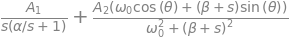

In [68]:
X = x(s)
X.expr

### C)

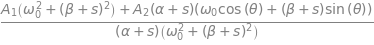

In [5]:
X.simplify().expr

### D)

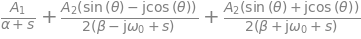

In [6]:
X.partfrac().simplify_terms().expr

### E)

In [7]:
list(X.poles())

ROC: Re{s} > max(-$\alpha$, -$\beta$)

# Question 2
## Laplace Analysis
### A)

In [2]:
a = Circuit("""
P1 1 0;
R1 1 2;
L 2 3;
R2 3 0;
C 3 0;
P2 3 0;
""")

### B)

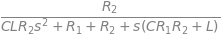

In [3]:
H = a.transfer(1, 0, 3, 0)
H.simplify().expr

### C)

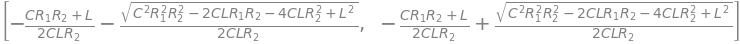

In [4]:
list(H.poles())

### D)

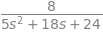

In [5]:
b = a.subs({'R1': 4, 'R2': 2, 'L': 2.5, 'C':0.25})
H = b.transfer(1, 0, 3, 0)
H.simplify().expr

In [123]:
print(0.25**2 * 4**2 * 2**2 - 2*0.25*4*2 - 4*0.25*2.5* 2**2 + 2.5**2)

-3.75


the poles are imaginary, so there will be sine terms in step response

In [6]:
vi = u(t)
Vi = vi(s)
SR = H * Vi
SR(t).simplify().expr

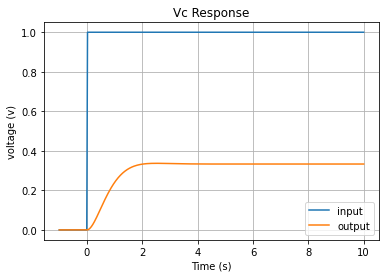

In [9]:
ax = vi.plot((-1, 10), label='input')
ax = SR(t).plot((-1, 10), axes=ax, label='output')
ax.set_title("Vc Response")
ax.set_ylabel("voltage (v)")
ax.legend()

### E)

In [10]:
a = Circuit("""
V1 1 0 {delta(t)};
R1 1 2;
L 2 3;
R2 3 0;
C 3 0;
P2 3 0;
""")

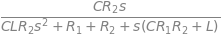

In [11]:
H = a.C.I(s)
H.simplify().expr

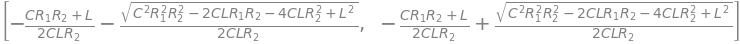

In [12]:
list(H.poles())

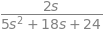

In [13]:
b = a.subs({'R1': 4, 'R2': 2, 'L': 2.5, 'C':0.25})
H = b.C.I(s)
H.simplify().expr

In [14]:
SR = H * Vi
SR(t, causal=True).simplify().expr

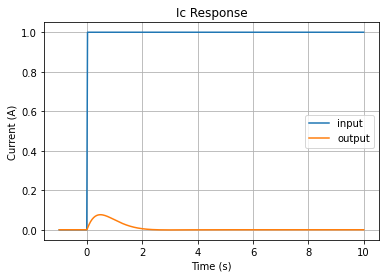

In [17]:
ax = vi.plot((-1, 10), label='input')
ax = SR(t, causal=True).plot((-1, 10), axes=ax, label='output')
ax.set_title("Ic Response")
ax.set_ylabel("Current (A)")
ax.legend()

## Laplace Transform
### A)

In [18]:
x = expr("(3-2*f_0)*delta(t)+((f_0**2)/2+((f_0**2)/2-6*f_0 -2)*cos(2*t)+((3*f_0**2)/2-2*f_0-6)*sin(2*t))*u(t)")
x = x + s(t, causal=True)
x.expr

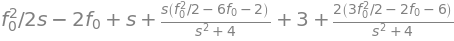

In [19]:
X = x(s)
X.expr

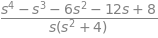

In [20]:
X = X.subs({'f_0': 2})
X.simplify().expr

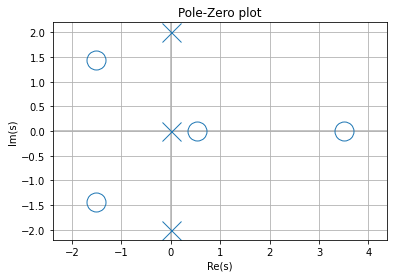

In [21]:
X.plot(title='Pole-Zero plot')

# Question 3
### A)

In [22]:
Z = impedance(4*(15*s**2 + 112*s + 80) / (s*(15*s**2 + 138*s + 136)))
Z.network()

(((C(121 
────
1295) + R(67081
─────
 6292)) | C(169 
────
2072)) + R(30
──
13)) | C(1/4)

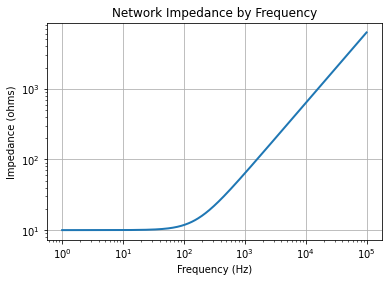

In [23]:
N = R(10) + L(1e-2)
vf = np.logspace(0, 5, 400)
Z = N.Z(f).evaluate(vf)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(vf, abs(Z), linewidth=2)
ax.set_title("Network Impedance by Frequency")
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Impedance (ohms)')
ax.grid(True)

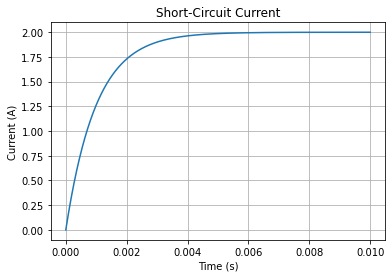

In [24]:
N = Vstep(20) + R(10) + L(1e-2, 0)
vt = np.linspace(0, 0.01, 1000)
N.Isc(t).plot(vt, title="Short-Circuit Current")

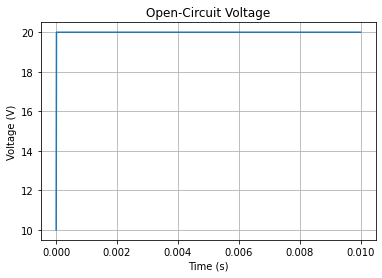

In [25]:
N.Voc(t).plot(vt, title="Open-Circuit Voltage")

# Question 4
## Discrete Analysis
### A)

In [26]:
x = expr('5*exp(-j*n*pi/4)*u(n) + 10*exp(-j*n*pi/3)*u(n)')
x.expr

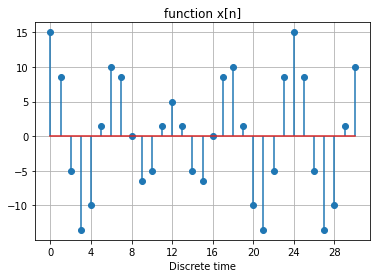

In [27]:
x.plot((0,30), title="function x[n]")

### B)

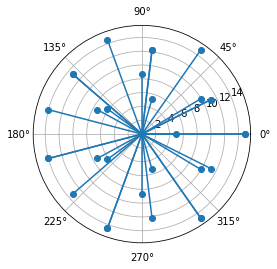

In [28]:
x.plot((0,30), polar=True)

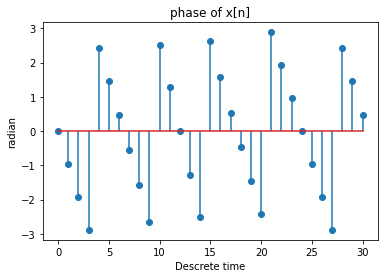

In [29]:
xs = x.seq((0,30)).as_array()
plt.stem(np.angle(xs))
plt.title("phase of x[n]")
plt.xlabel("Descrete time")
plt.ylabel("radian")

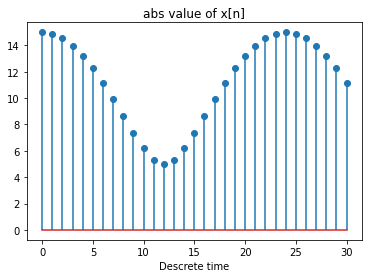

In [30]:
plt.stem(np.abs(xs))
plt.title("abs value of x[n]")
plt.xlabel("Descrete time")

## Sequence
### A)

In [27]:
x1 = expr('exp(-j*n*pi/2)*u(n)')
x1.expr

In [28]:
x2 = expr('n*u(n)')
x2.expr

In [29]:
x1_ = x1.seq((0,5))
x2_ = x2.seq((0,5))

### B)

In [30]:
x3 = x1_ + x1_
x3

{_1, -ⅉ, -1, ⅉ, 1, -ⅉ, 1, -ⅉ, -1, ⅉ, 1, -ⅉ}

In [31]:
x4 = seq((0, 0, 0, 0, 0, 0))
for m in range(0, 6):
    for i in range(0, 6):
        x4[m] += x3(5-m+i)*x2_(i)

### C)

In [32]:
x4

{_3 + 2⋅ⅉ, -2 + ⅉ, -1 - 6⋅ⅉ, 6 - 7⋅ⅉ, 7 - 2⋅ⅉ, 2 - 3⋅ⅉ}

## Discrete Transforms
### A)

In [32]:
x = expr('(0.5 - a)**n*u(n) + 10*(a+1/3)**n*u(n)')
x.expr

In [33]:
X = x.subs({'a': 1})(z)
X.partfrac().simplify_terms().expr

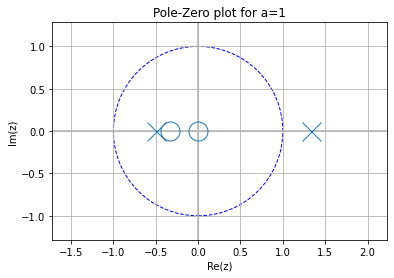

In [34]:
X(z).plot(title="Pole-Zero plot for a=1")

In [35]:
X = x.subs({'a': 1.5})(z)
X.partfrac().simplify_terms().expr

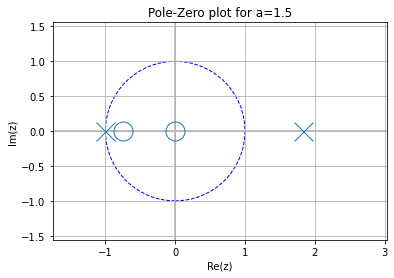

In [36]:
X(z).plot(title="Pole-Zero plot for a=1.5")

In [37]:
X = x.subs({'a': 3})(z)
X.partfrac().simplify_terms().expr

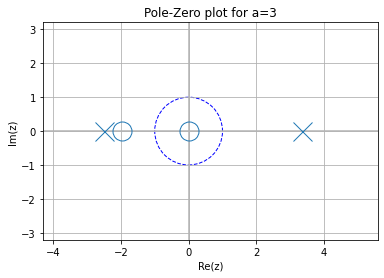

In [38]:
X(z).plot(title="Pole-Zero plot for a=3")

### B)

In [94]:
x = expr('n*a**n*u(n)')
x.expr

#### 1.

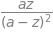

In [95]:
X = x(z)
X.simplify().expr

#### 2.

In [96]:
X(n).simplify().expr

#### 3.

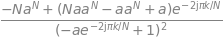

In [97]:
x.DFT().expr

#### 4.

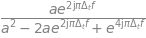

In [98]:
x.DTFT().expr

#### 5.

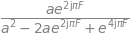

In [102]:
x.DTFT(F).expr

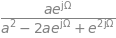

In [103]:
x.DTFT(Omega).expr

#### 6.

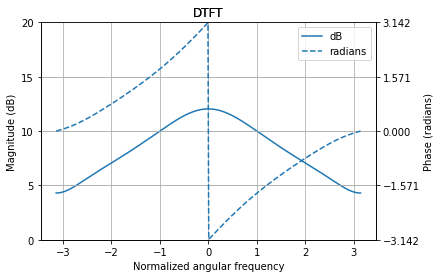

In [39]:
x.subs({'a': 3}).DTFT(Omega).plot(title="DTFT")

# Question 5
### A)

In [41]:
a = symbol('a')
b = symbol('b')
c = symbol('c')
d = symbol('d')
lpf = DLTIFilter((a, b, ), (1, c, d))
LPF = lpf.difference_equation()
LPF.expr

### B)

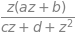

In [42]:
LPF.transfer_function().expr

### C)

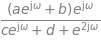

In [43]:
transform = LPF.transfer_function()
transform.subs({'z': exp(j*omega)}).simplify().expr

### D)

In [44]:
lpf = lpf.subs({'a':1, 'b':1, 'c':-3, 'd':2})
LPF = lpf.difference_equation()
LPF.expr

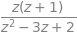

In [45]:
H = LPF.transfer_function()
H.simplify().expr

### E)

In [46]:
H.difference_equation('x', 'y', 'iir').expr

the block diagram is drawn in the report
### F)

In [58]:
x = expr('2**n*u(n)')
X = x(z)
X.simplify().expr

In [65]:
Y = H*X
y = Y(n)
y.seq((0,3))

{_1, 6, 22, 66}